# Section 15.7
## 15.6.1 Loading the MNIST Dataset

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## 15.6.2 Data Exploration

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

### Visualizing Digits

In [7]:
# enable high-res images in notebook (not in the book's code)
%config InlineBackend.figure_format = 'retina'

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
sns.set(font_scale=2)

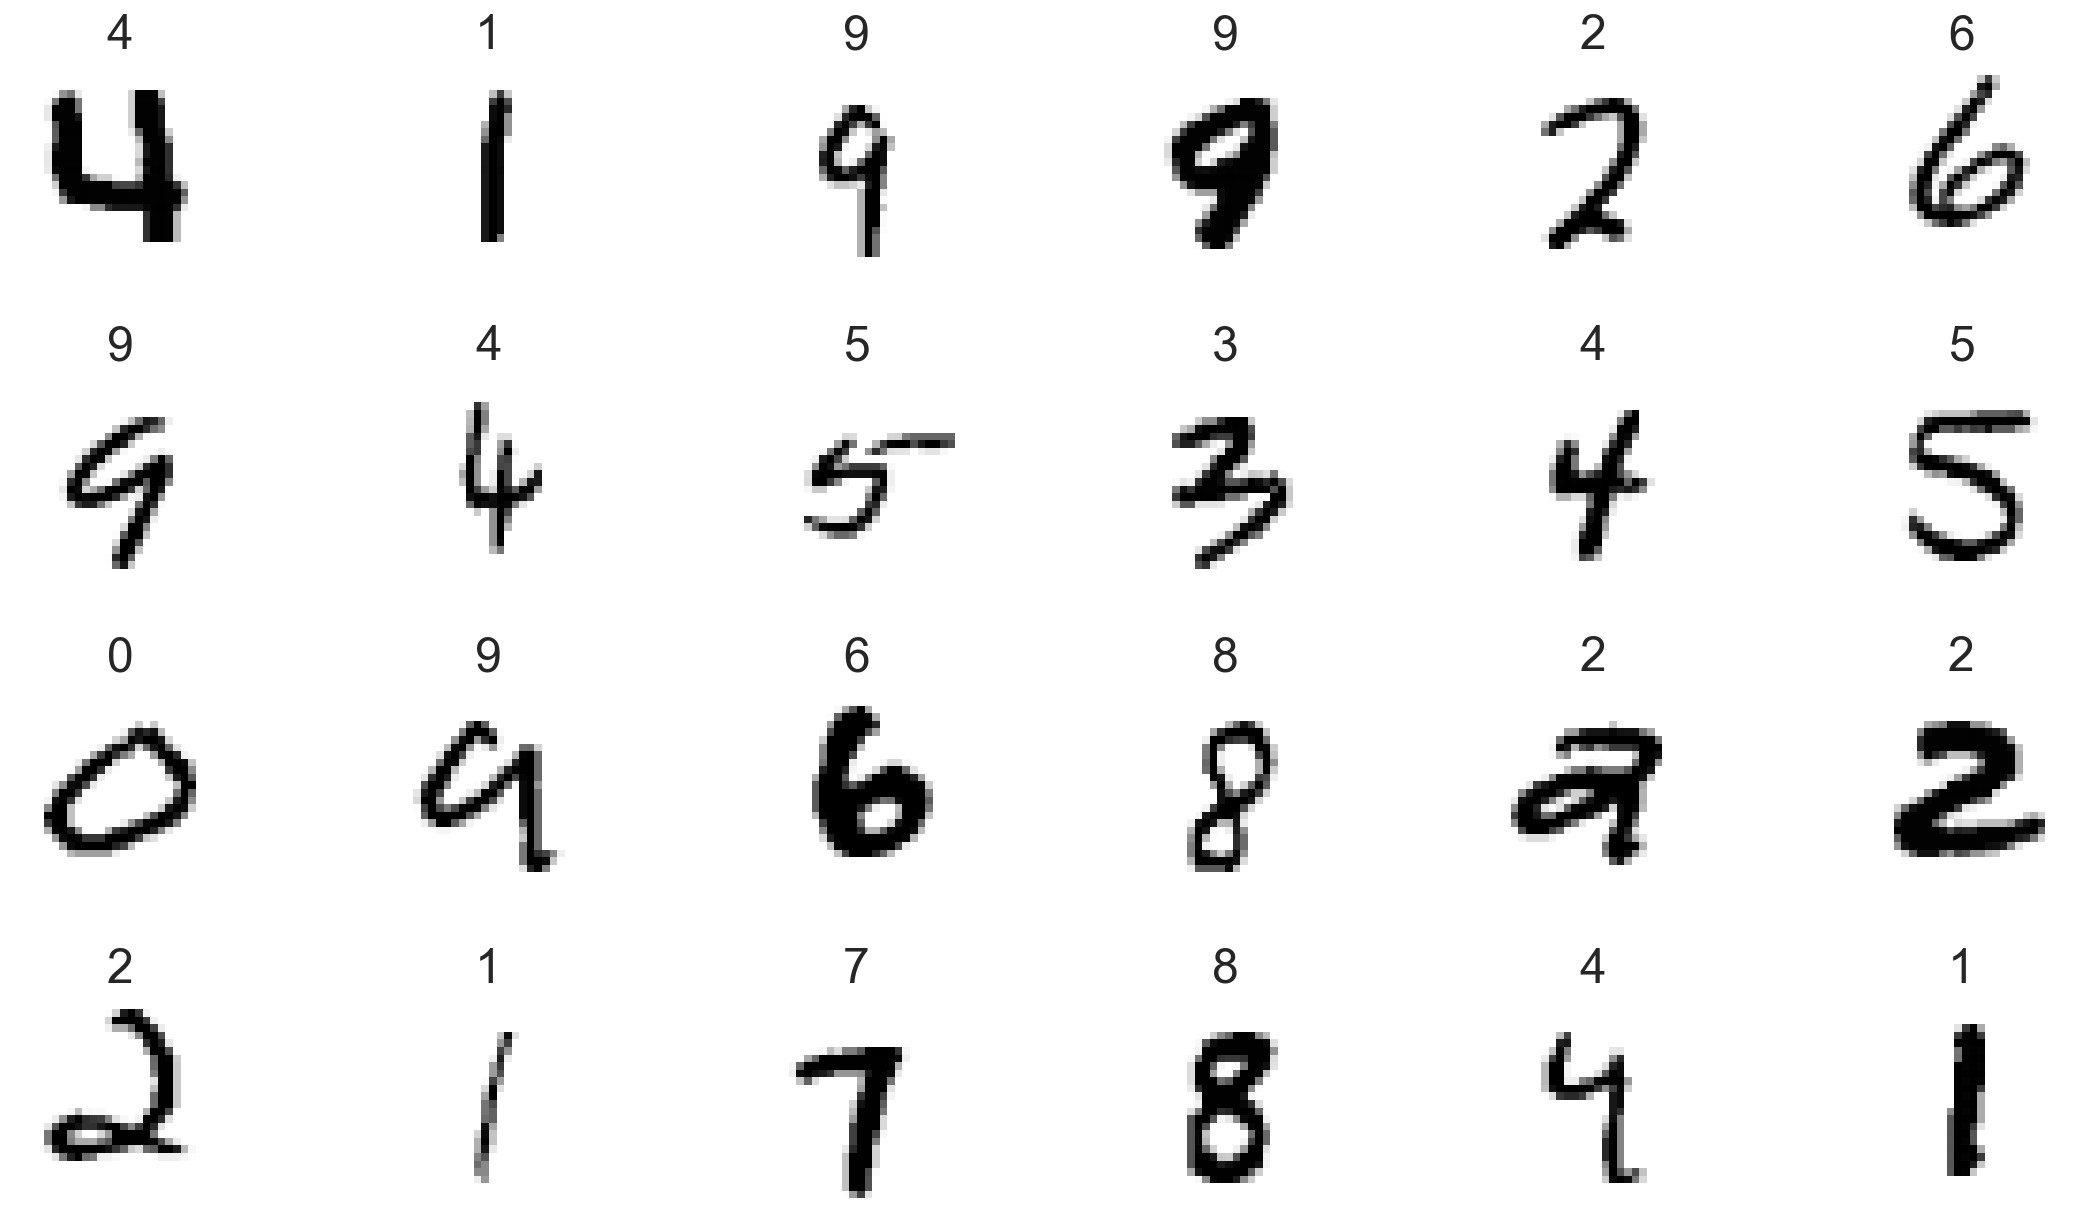

In [12]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [13]:
sns.set(font_scale=1)  # reset font scale--Not in book's code

## 15.6.3 Data Preparation
### Reshaping the Image Data 

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
X_test.shape

(10000, 28, 28, 1)

### Normalizing the Image Data

In [18]:
X_train = X_train.astype('float32') / 255

In [19]:
X_test = X_test.astype('float32') / 255

### One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train)

In [22]:
y_train.shape

(60000, 10)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

## 15.6.4 Creating the Neural Network

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
cnn = Sequential()

### Adding Layers to the Network

In [28]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

### Convolution 
### Adding a **`Conv2D`** Convolution Layer to Our Model 

In [29]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

### Dimensionality of the First Convolution Layer’s Output
### Overfitting
### Adding a Pooling Layer

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

### Adding Another Convolutional Layer and Pooling Layer

In [31]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

### Flattening the Results

In [33]:
cnn.add(Flatten())

### Adding a **`Dense`** Layer to Reduce the Number of Features

In [34]:
cnn.add(Dense(units=128, activation='relu'))

### Adding Another **`Dense`** Layer to Produce the Final Results

In [35]:
cnn.add(Dense(units=10, activation='softmax'))

### Printing the Model’s Summary

In [36]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Visualizing a Model’s Structure

In [37]:
from tensorflow.keras.utils import plot_model

In [38]:
from IPython.display import Image

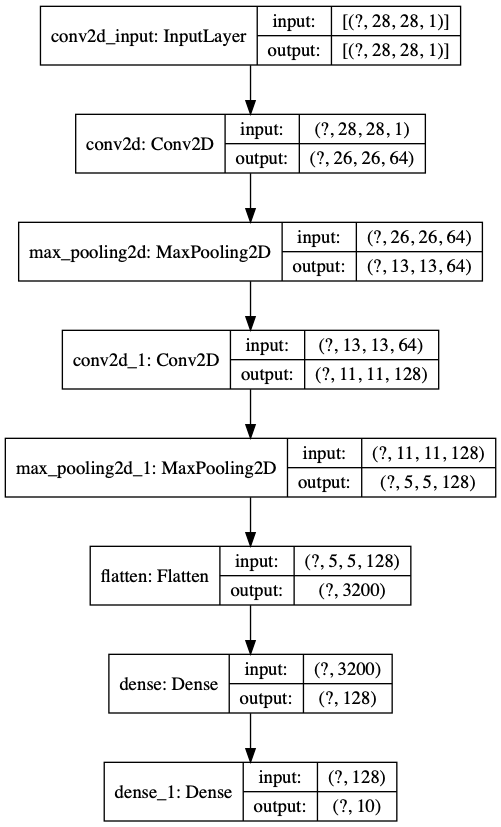

In [39]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)

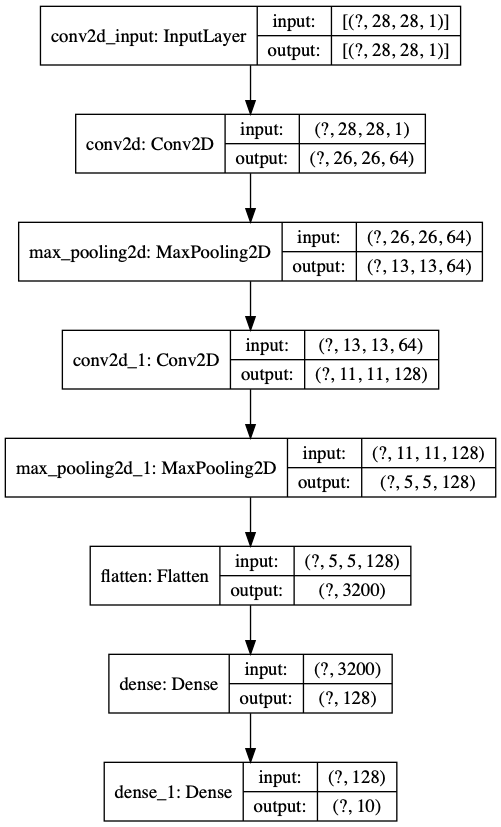

In [40]:
Image(filename='convnet.png') 

### Compiling the Model

In [41]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

## 15.6.5 Training and Evaluating the Model 

In [42]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 155s 3ms/sample - loss: 0.1370 - accuracy: 0.9571 - val_loss: 0.0404 - val_accuracy: 0.9890
Epoch 2/5
54000/54000 [==============================] - 119s 2ms/sample - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 3/5
54000/54000 [==============================] - 126s 2ms/sample - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0328 - val_accuracy: 0.9920
Epoch 4/5
54000/54000 [==============================] - 128s 2ms/sample - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0308 - val_accuracy: 0.9913
Epoch 5/5
54000/54000 [==============================] - 151s 3ms/sample - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0405 - val_accuracy: 0.9905


### Evaluating the Model

In [43]:
loss, accuracy = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 6s 642us/sample - loss: 0.0374 - accuracy: 0.9881


In [44]:
loss

0.03743863695290347

In [45]:
accuracy

0.9881

### Making Predictions

In [46]:
predictions = cnn.predict(X_test)

In [47]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [48]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000272%
1: 0.0000000952%
2: 0.0000147175%
3: 0.0001722604%
4: 0.0000000003%
5: 0.0000000274%
6: 0.0000000000%
7: 99.9995946884%
8: 0.0000005358%
9: 0.0002231040%


### Locating the Incorrect Predictions

In [49]:
images = X_test.reshape((10000, 28, 28))

In [50]:
incorrect_predictions = []

In [51]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [52]:
len(incorrect_predictions)

119

### Visualizing Incorrect Predictions

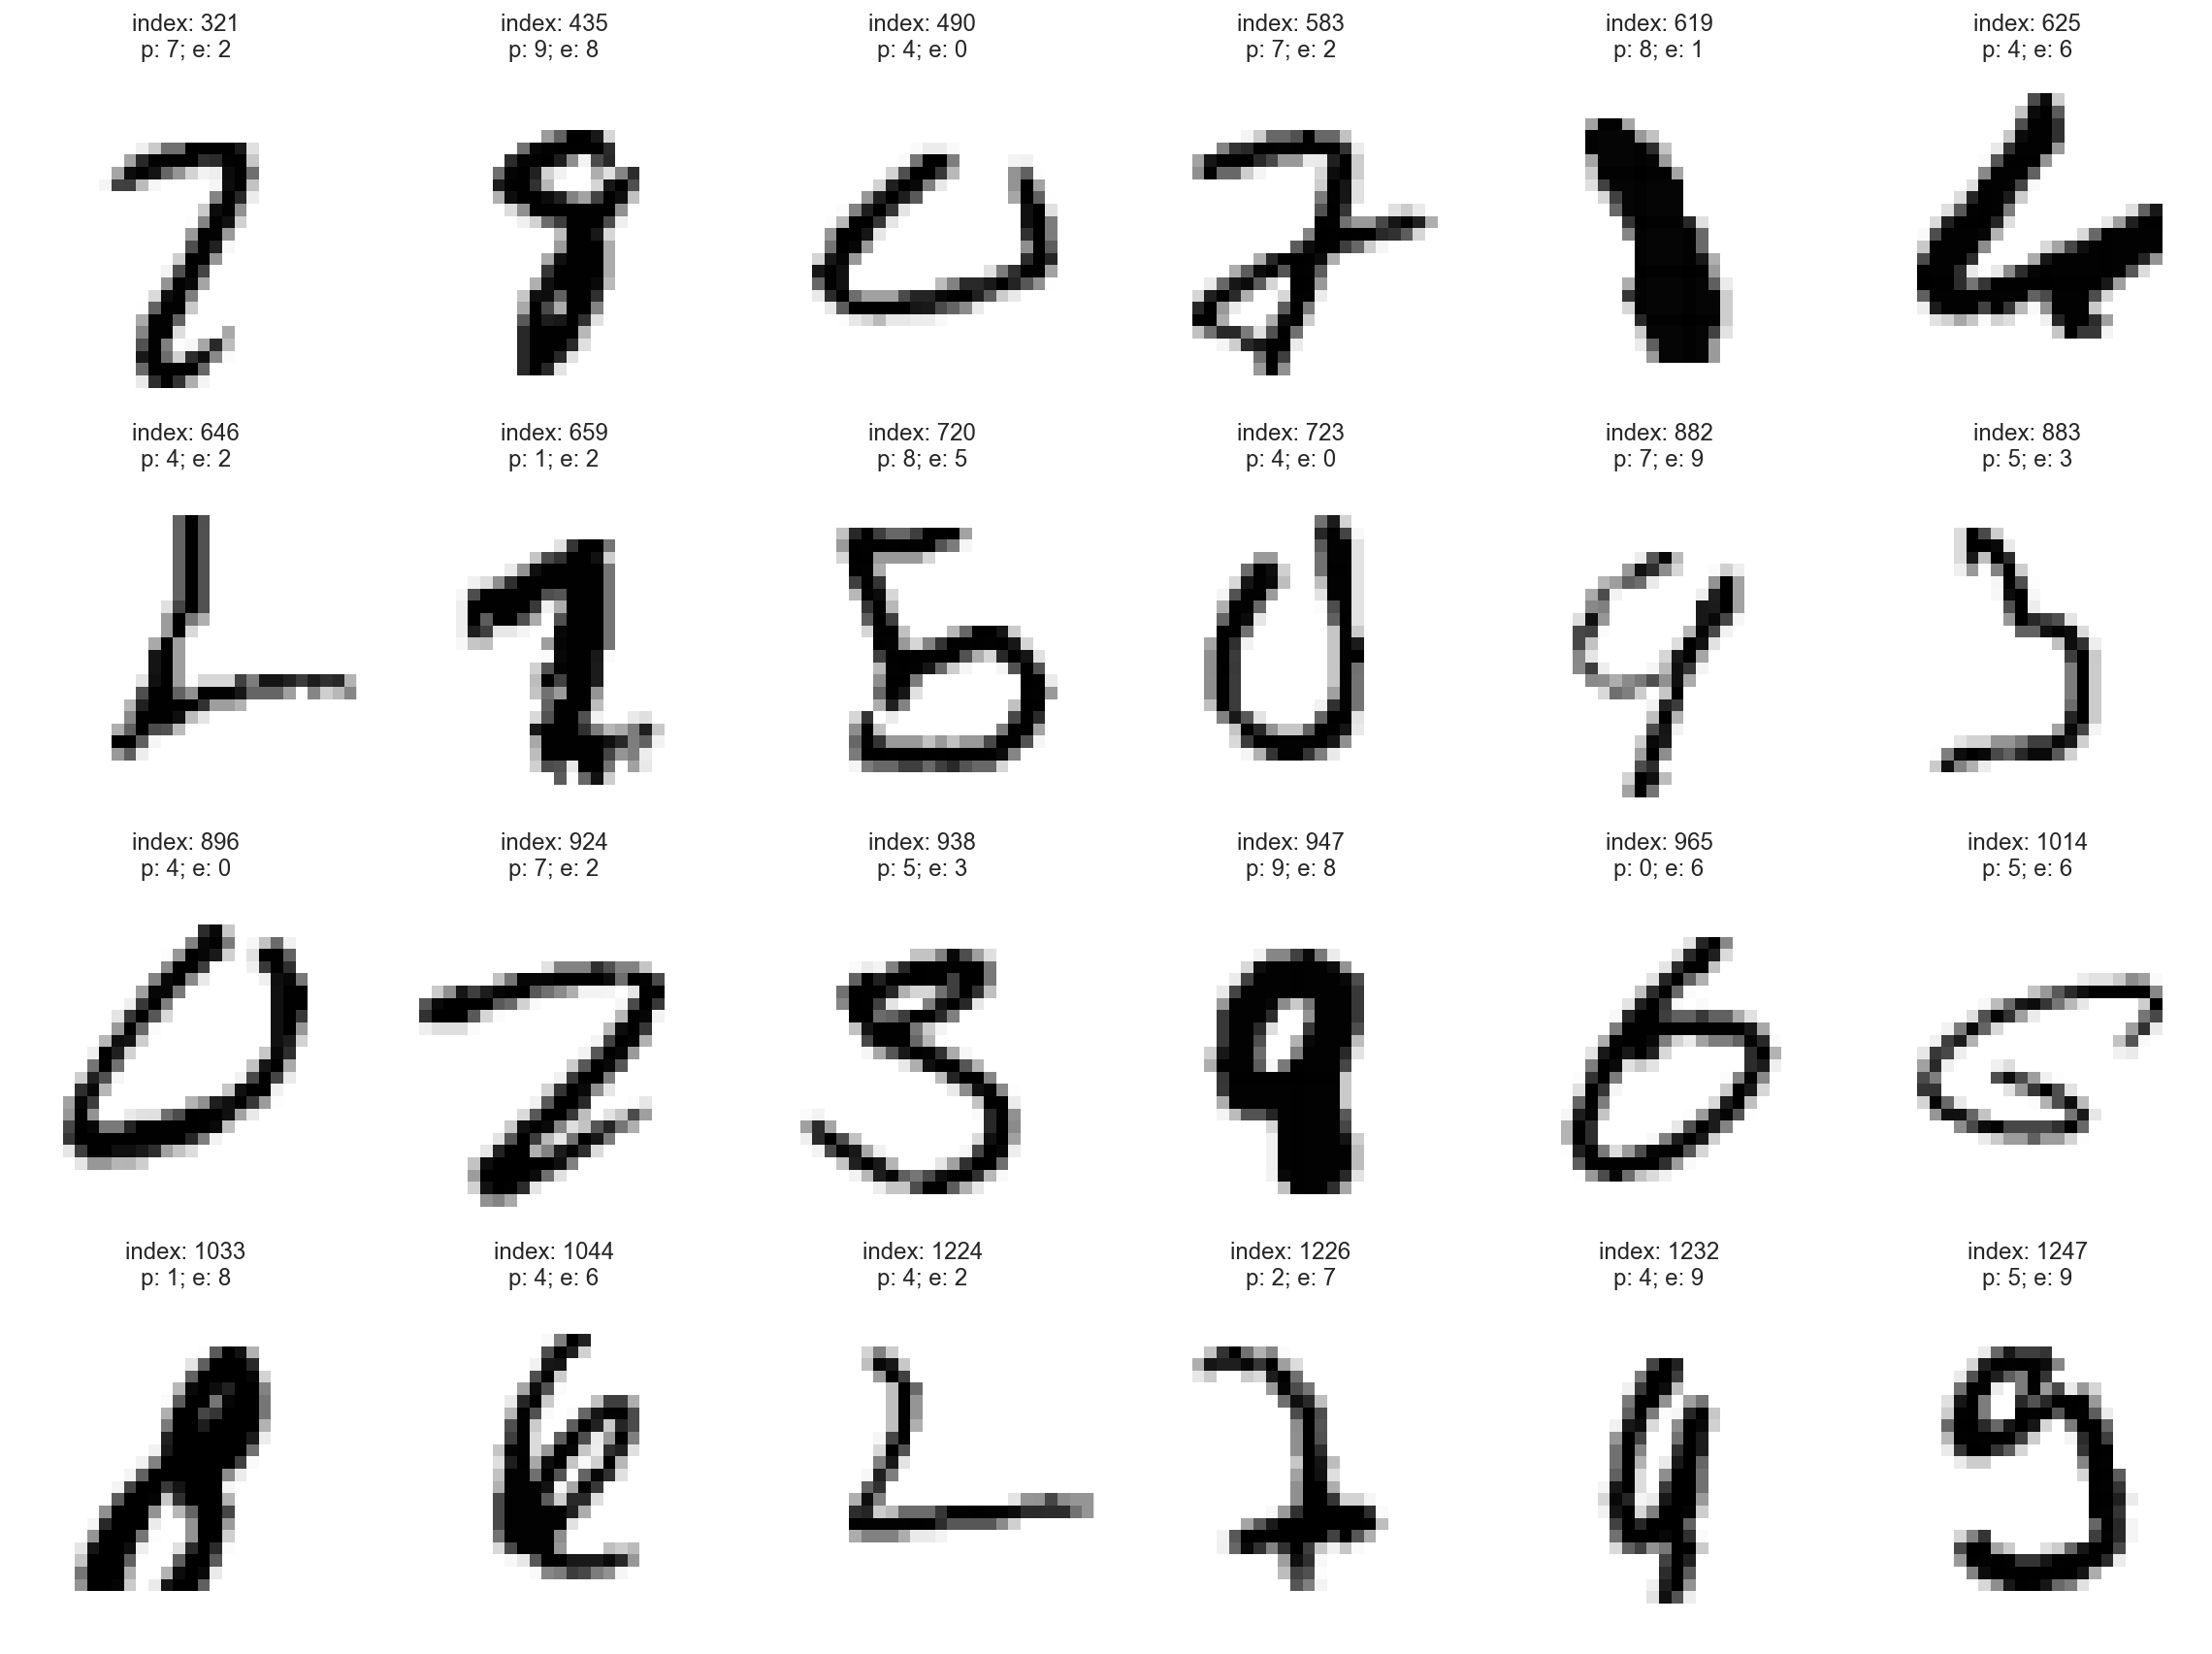

In [53]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

### Displaying the Probabilities for Several Incorrect Predictions

In [54]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [55]:
display_probabilities(predictions[583])

0: 0.0000000021%
1: 0.0000174413%
2: 9.6773408353%
3: 1.4208845794%
4: 0.0000033368%
5: 0.0000000101%
6: 0.0000000033%
7: 87.6960039139%
8: 1.2056970038%
9: 0.0000566866%


In [56]:
display_probabilities(predictions[625])

0: 0.0000000065%
1: 0.0000000619%
2: 0.0000290713%
3: 0.0000000001%
4: 97.4607884884%
5: 0.0000000000%
6: 2.5391852483%
7: 0.0000000012%
8: 0.0000000221%
9: 0.0000026189%


In [57]:
display_probabilities(predictions[1299])

0: 0.0001058873%
1: 0.0004994010%
2: 0.0009247638%
3: 1.0451387614%
4: 0.0000004712%
5: 98.9270329475%
6: 0.0000000417%
7: 0.0248965691%
8: 0.0001233145%
9: 0.0012836002%


## 15.6.6 Saving and Loading a Model

In [58]:
cnn.save('mnist_cnn.h5')